# 1) Auto Repair Shop

In [14]:
using DataFrames

In [15]:
# if the number of hours work is equal to zero, it is assumed that only inspection was needed
function calculate_autorepair_costs(hours::Real, part_costs::Real;
        inspection_cost::Real = 75.0, labor_cost::Real = 75.0, minimum_pay = 120.0)
    if hours == 0
        return inspection_cost
    else
        return max(round(hours * labor_cost + part_costs, digits=2), minimum_pay)
    end
end

calculate_autorepair_costs (generic function with 1 method)

In [16]:
println(calculate_autorepair_costs(0, 0))
println(calculate_autorepair_costs(1, 30))
println(calculate_autorepair_costs(4, 120))

75.0
120.0
420.0


In [18]:
shopdata = DataFrame(
    "customer name" => ["Julia", "Judit", "Jayden", "Jake", "Joshua"],
    "hours worked" => round.(10 * rand(5), digits=1),
    "part costs" => rand(100:2000, 5),
)
shopdata."hours worked"[3] = 0.0
shopdata."part costs"[3] = 0.0
display(shopdata)

,customer name,hours worked,part costs
,String,Float64,Int64
1,Julia,6.5,1362
2,Judit,9.1,425
3,Jayden,0.0,0
4,Jake,1.4,742
5,Joshua,1.6,206


In [19]:
for (name, hours, pc) in zip(shopdata."customer name", shopdata."hours worked", shopdata."part costs")
    println(name, ":\t\$", calculate_autorepair_costs(hours, pc))
end

Julia:	$1849.5
Judit:	$1107.5
Jayden:	$75.0
Jake:	$847.0
Joshua:	$326.0


# 2) Sum and Simplification of Fractions
## Structures and Functions

In [1]:
mutable struct Fraction{T<:Number}
    num::T
    den::T
    function Fraction(type::Type, num::Number, den::Number;
            simplify::Bool = true)
        if den == 0
            error("No division by zero!")
        end

        num = convert(type, num)
        den = convert(type, den)

        if simplify
            factor = gcd(num, den)
            num /= factor
            den /= factor
            num *= sign(den)
            den *= sign(den)
        end

        return new{type}(num, den)
    end
end

Fraction(num::Number, den::Number) = Fraction(typeof(eval(num + den)), num, den)

function simplify!(frac::Fraction)
    factor = gcd(frac.num, frac.den)
    frac.num /= factor
    frac.den /= factor
    frac.num *= sign(den)
    frac.den *= sign(den)
end

Base.:(+)(a::Fraction, b::Fraction) = Fraction(a.num * b.den + b.num * a.den, a.den * b.den)

### Mixed Fractions

In [2]:
mutable struct MixedFraction{T<:Number}
    whole::Integer
    num::T
    den::T
    function MixedFraction(type::Type, num::Number, den::Number;
            whole::Integer = 0)
        if den == 0
            error("No division by zero!")
        end

        num = convert(type, num)
        den = convert(type, den)
        added_whole, num = divrem(num, den)
        whole += added_whole

        factor = gcd(num, den)
        num /= factor
        den /= factor
        num *= sign(den)
        den *= sign(den)

        new{type}(Int(whole), num, den)
    end
end

MixedFraction(num::Number, den::Number; whole::Integer = 0) = MixedFraction(
    typeof(eval(num + den)), num, den; whole=whole)

MixedFraction(frac::Fraction) = MixedFraction(frac.num, frac.den)

function simplify!(mfrac::MixedFraction)
    added_whole, mfrac.num = divrem(num, den)
    mfrac.whole += Int(added_whole)

    factor = gcd(mfrac.num, mfrac.den)
    mfrac.num /= factor
    mfrac.den /= factor
    mfrac.num *= sign(den)
    mfrac.den *= sign(den)
end

Base.:(+)(a::MixedFraction, b::MixedFraction) = MixedFraction(
    a.num * b.den + b.num * a.den, a.den * b.den; whole = a.whole + b.whole)

### Printing Functions

In [3]:
latexfrac(num, den) = "\\frac{" * string(num) * "}{" * string(den) * "}"

function latexfrac(frac::Fraction)
    if frac.num > 0
        latexfrac(frac.num, frac.den)
    elseif frac.num == 0
        return "0"
    else
        return "-" * latexfrac(-frac.num, frac.den)
    end
end

function latexfrac(mfrac::MixedFraction)
    if mfrac.whole != 0
        return string(mfrac.whole) * latexfrac(mfrac.num, mfrac.den)
    else
        return latexfrac(mfrac.num, mfrac.den)
    end
end

latexfrac (generic function with 3 methods)

In [19]:
result_table(fracstr1, fracstr2, frac1, frac2, result) = (
    "| label | raw | simplified | mixed |\n| :--- | :---: | :---: | ---: |  \n"
    * "| Fraction 1 | \$" * latexfrac(fracstr1[1], fracstr1[2]) * "\$ | \$"
    * latexfrac(frac1) * "\$ | \$" * latexfrac(MixedFraction(frac1)) * "\$ |  \n"
    * "| Fraction 2 | \$" * latexfrac(fracstr2[1], fracstr2[2]) * "\$ | \$"
    * latexfrac(frac2) * "\$ | \$" * latexfrac(MixedFraction(frac2)) * "\$ |  \n"
    * "| Sum | \$" * latexfrac(frac1) * "+" * latexfrac(frac2) * "\$ | \$"
    * latexfrac(frac1 + frac2) * "\$ | \$" * latexfrac(MixedFraction(frac1 + frac2)) * "\$ |"
)

result_table (generic function with 1 method)

## Main Program

In [20]:
fracstr1 = split(readline(stdin))
fracstr2 = split(readline(stdin))
frac1 = Fraction(parse(Int, fracstr1[1]), parse(Int, fracstr1[2]))
frac2 = Fraction(parse(Int, fracstr2[1]), parse(Int, fracstr2[2]))
result = frac1 + frac2

display("text/markdown", result_table(fracstr1, fracstr2, frac1, frac2, result))

| label | raw | simplified | mixed |
| :--- | :---: | :---: | ---: |  
| Fraction 1 | $\frac{3}{5}$ | $\frac{3}{5}$ | $\frac{3}{5}$ |  
| Fraction 2 | $\frac{2}{3}$ | $\frac{2}{3}$ | $\frac{2}{3}$ |  
| Sum | $\frac{3}{5}+\frac{2}{3}$ | $\frac{19}{15}$ | $1\frac{4}{15}$ |

In [21]:
fracstr1 = split(readline(stdin))
fracstr2 = split(readline(stdin))
frac1 = Fraction(parse(Int, fracstr1[1]), parse(Int, fracstr1[2]))
frac2 = Fraction(parse(Int, fracstr2[1]), parse(Int, fracstr2[2]))
result = frac1 + frac2

display("text/markdown", result_table(fracstr1, fracstr2, frac1, frac2, result))

| label | raw | simplified | mixed |
| :--- | :---: | :---: | ---: |  
| Fraction 1 | $\frac{30}{-8}$ | $-\frac{15}{4}$ | $-3\frac{-3}{4}$ |  
| Fraction 2 | $\frac{-10}{-4}$ | $\frac{5}{2}$ | $2\frac{1}{2}$ |  
| Sum | $-\frac{15}{4}+\frac{5}{2}$ | $-\frac{5}{4}$ | $-1\frac{-1}{4}$ |

# 3) Tax

In [11]:
function calculate_tax(income::Real)
    taxable_income = 0.8 * income
    if taxable_income <= 15000
        return 0.1 * taxable_income
    elseif taxable_income <= 35000
        return 1500 + 0.2 * (taxable_income - 15000)
    else
        return 5500 + 0.25 * (taxable_income - 35000)
    end
end

calculate_tax (generic function with 1 method)

In [12]:
income = parse(Float64, readline())
tax = calculate_tax(income)
println("For your \$$income income, you must pay \$$tax in taxes. "
    * "Your average tax rate is $(tax / income * 100)%.")

For your $20000.0 income, you must pay $1700.0 in taxes. Your average tax rate is 8.5%.


In [13]:
income = parse(Float64, readline())
tax = calculate_tax(income)
println("For your \$$income income, you must pay \$$tax in taxes. "
    * "Your average tax rate is $(tax / income * 100)%.")

For your $50000.0 income, you must pay $6750.0 in taxes. Your average tax rate is 13.5%.


# 4) Carpeting the Hotel Rooms

In [22]:
using DataFrames

In [25]:
rooms = DataFrame(
    "Number" => collect(1:400),
    "Length" => round.(3 .+ 7 * rand(400), digits=1),
    "Breadth" => round.(3 .+ 7 * rand(400), digits=1),
    "Cost per Square Meter" => round.(20 .+ 7 * rand(400), digits=2))

,Number,Length,Breadth,Cost per Square Meter
,Int64,Float64,Float64,Float64
1,1,5.5,5.5,21.92
2,2,5.5,9.0,21.79
3,3,4.1,7.6,21.5
4,4,7.8,4.4,21.74
5,5,3.7,7.9,24.28
6,6,3.3,4.6,20.11
7,7,4.8,6.8,26.19
8,8,6.7,4.5,26.3
9,9,7.1,5.4,22.28


In [29]:
rooms_solved = DataFrame(
    "Number" => rooms.Number,
    "Area" => rooms.Length .* rooms.Breadth,
    "Carpet Cost" => round.(rooms.Length .* rooms.Breadth .* rooms."Cost per Square Meter", digits=2)
)

,Number,Area,Carpet Cost
,Int64,Float64,Float64
1,1,30.25,663.08
2,2,49.5,1078.6
3,3,31.16,669.94
4,4,34.32,746.12
5,5,29.23,709.7
6,6,15.18,305.27
7,7,32.64,854.84
8,8,30.15,792.94
9,9,38.34,854.22


In [31]:
print("The cost of carpeting every room is \$$(round(sum(rooms_solved."Carpet Cost"), digits=2))")

The cost of carpeting every room is $375096.1

In [33]:
print("Room $(rooms_solved.Number[argmax(rooms_solved."Carpet Cost")]) "
    * "costs the most to carpet (\$$(maximum(rooms_solved."Carpet Cost"))).")

Room 304 costs the most to carpet ($2356.1).

# 5) Consecutive Numbers

In [55]:
function find_longest_consecutive_sequence(a::Vector)
    element = a[1]
    reps = 1

    new_element = a[1]
    new_reps = 1

    for e in a[2:end]
        if new_reps == 0
            new_element = e
            new_reps = 1
        elseif e == new_element
            new_reps += 1
        else
            if new_reps > reps
                reps = new_reps
                element = new_element
            end
            new_reps = 0
        end
    end

    # if the last sequence was the longest one
    if new_reps > reps
        reps = new_reps
        element = new_element
    end

    return element, reps
end

find_longest_consecutive_sequence (generic function with 1 method)

In [56]:
a = rand(1:9, 5000)

5000-element Vector{Int64}:
 6
 9
 7
 8
 1
 5
 1
 3
 4
 7
 5
 2
 1
 ⋮
 1
 9
 8
 3
 3
 7
 8
 6
 5
 4
 7
 4

In [59]:
num, reps = find_longest_consecutive_sequence(a)
print("In the longest consecutive sequence, $num appears $reps times")

In the longest consecutive sequence, 3 appears 5 times

# 6) Perfect Squares

In [1]:
# Babylonian method
function isPerfectSquare(n::Integer)
    if n < 0
        return false
    elseif n == 0 || n == 1
        return true
    end

    guess = n ÷ 2
    prevguess = Set()
    while guess * guess != n
        guess = (guess + n ÷ guess) ÷ 2
        if guess in prevguess
            return false
        end
        push!(prevguess, guess)
    end
    return true
end

isPerfectSquare (generic function with 1 method)

In [2]:
println(isPerfectSquare(64))
println(isPerfectSquare(63))
println(isPerfectSquare(-64))
println(isPerfectSquare(0))
println(isPerfectSquare(1))

true
false
false
true
true


# 7) Collatz Sequence

In [3]:
function collatz_sequence(n::Integer)
    sequence = [n]
    while n != 1
        n = n % 2 == 0 ? n / 2 : 3n + 1
        push!(sequence, n)
    end
    return sequence
end

collatz_sequence (generic function with 1 method)

In [4]:
seq = collatz_sequence(parse(Int, readline()))
println(length(seq))
for n in seq
    print(n, ' ')
end

10
13 40 20 10 5 16 8 4 2 1 

In [5]:
input = split(readline())
m = parse(Int, input[1])
n = parse(Int, input[2])

maxlen = length(collatz_sequence(m))
maxn = m
for i in m+1:n
    len = length(collatz_sequence(i))
    if len > maxlen
        maxlen = len
        maxn = i
    end
end

print("$maxn generates the longest sequence of length $maxlen")

9 generates the longest sequence of length 20

# 8) Monte Carlo Integration

In [39]:
using Plots

In [37]:
n = 100000
x, y = 2 * rand(n) .- 1, 2 * rand(n) .- 1 # -1 < x, y < +1

inside = x.^2 + y.^2 .< 1 # r = 1, x^2 + y^2 < r^2
outside = .!inside

xin, yin = x[inside], y[inside]
xout, yout = x[outside], y[outside]

nin = length(xin)
display(MIME"text/latex"(), "\$\\pi=$(4 * nin/n)\$")

We expect the ratio of the number of points inside the circle to all of the points to be the equal to the ratio of the area of the circle to the area of the square. therefore, if the radius of the circle is equal to $r$
$$\frac{\mathrm{\#\ points\ inside}}{\mathrm{\#\ all\ points}}\approx\frac{\pi r^2}{(2r)^2}\implies$$
$$\pi \approx 4\frac{\mathrm{\#\ points\ inside}}{\mathrm{\#\ all\ points}}$$
(the square's side is equal to the diameter of the circle)

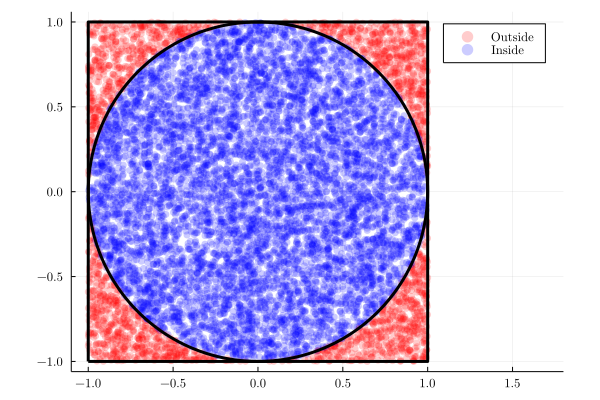

In [60]:
Plots.default(msw=0, lw=3, fontfamily="Computer Modern")
rectangle(w, h, x, y) = Shape(x .+ [0,w,w,0], y .+ [0,0,h,h])

scatter(xout[1:10:end], yout[1:10:end], c=:red, alpha=0.2, label="Outside", xlim=(-1.1, 1.8))
scatter!(xin[1:10:end], yin[1:10:end], c=:blue, alpha=0.2, label="Inside")
plot!(rectangle(2,2,-1,-1), fill=:transparent, label="")
plot!(cos, sin, 0, 2π, c=:black, ratio=:equal, label="")

# 9) Binary Search

In [4]:
using IJulia: readprompt

min = 1
max = 100
mid = 50
while mid != max
    print("Is your number less than $mid? (yes/no)")
    answer = readprompt("Is your number less than $mid? (yes/no)")
    println(" " * answer)
    if answer == "yes"
        max = mid - 1
    elseif answer == "no"
        min = mid
    end
    mid = (max - min) ÷ 2 + min
end
println("Your number is $min.")

Is your number less than 50? (yes/no) yes
Is your number less than 25? (yes/no) yes
Is your number less than 12? (yes/no) no
Is your number less than 18? (yes/no) yes
Is your number less than 14? (yes/no) no
Is your number less than 15? (yes/no) yes
Your number is 14.
